In [12]:
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem,PandasTools
import rdkit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, balanced_accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
import xgboost as xgb

In [3]:
df=pd.read_csv(r"C:\Users\19189\Desktop\original_data.csv")

In [4]:
df

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641
...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config

In [6]:
def MACCSfp(mol):
    fp = rdkit.Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199,
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973,
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219,
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641,
...,...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420,
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273,
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061,
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671,

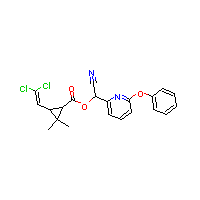
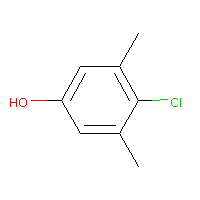
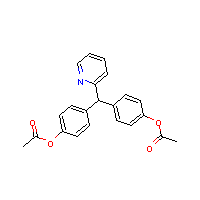
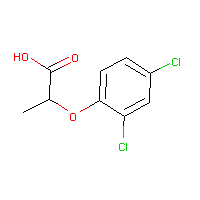
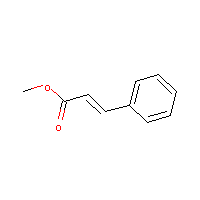
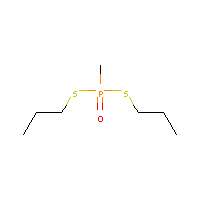
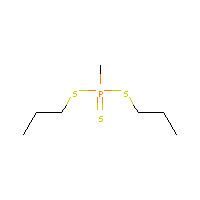
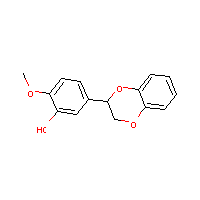
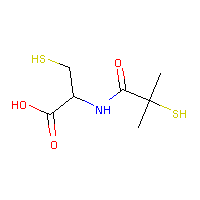
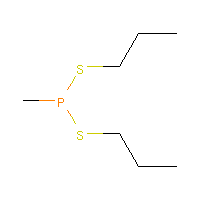

In [7]:
PandasTools.AddMoleculeColumnToFrame(df,'Canonical_QSARr','Molecule')
df

In [8]:
df["MACCSFPs"] =df.Molecule.apply(MACCSfp)
df.head(2)

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule,MACCSFPs
0,68523-18-2,460.0,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,<rdkit.Chem.rdchem.Mol object at 0x000001B4B70...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,88-04-0,3830.0,CC1C=C(O)C=C(C)C=1Cl,3.583199,<rdkit.Chem.rdchem.Mol object at 0x000001B4B70...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
fp_df = df["MACCSFPs"].apply(pd.Series)
fp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,0


In [10]:
x = fp_df.iloc[:,0:167]
y = df['LogLD50'].values

In [13]:
import optuna

def objective(trial):
    param = {
        "n_estimators":trial.suggest_int("n_estimators", 100, 300, step=20),
        "verbosity": 0,
        "objective": 'reg:squarederror',
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        'random_state':42,
    }
        # maximum depth of the tree, signifies complexity of the tree.
    param["max_depth"] = trial.suggest_int("max_depth", 3, 11, step=2)
        # minimum child weight, larger the term more conservative the tree.
    param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
    param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
    param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    xgb_model = xgb.XGBRegressor(**param)

    r2 = cross_val_score(xgb_model, x, y, n_jobs=-1, cv=5, scoring="r2").mean()
    
    return r2

study = optuna.create_study(
    direction="maximize",
    study_name="xgboost_parameter_opt",
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    )

study.optimize(objective, n_trials=100)
df = study.trials_dataframe()
df.to_csv(r'C:\Users\19189\Desktop\MACCS_xgb_trial1.csv',index=False)

[I 2024-03-19 13:05:00,687] A new study created in memory with name: xgboost_parameter_opt
[I 2024-03-19 13:05:14,164] Trial 0 finished with value: -0.09720143688264415 and parameters: {'n_estimators': 240, 'booster': 'gbtree', 'lambda': 0.831005638003509, 'alpha': 0.884391820997658, 'subsample': 0.5479552219487949, 'colsample_bytree': 0.8274705826067179, 'max_depth': 7, 'min_child_weight': 2, 'eta': 1.7410437501641237e-07, 'gamma': 1.0332023192485298e-08, 'grow_policy': 'lossguide'}. Best is trial 0 with value: -0.09720143688264415.
[I 2024-03-19 13:05:19,969] Trial 1 finished with value: -0.09722379035165796 and parameters: {'n_estimators': 160, 'booster': 'gbtree', 'lambda': 0.0036167140856654388, 'alpha': 0.018982439625423397, 'subsample': 0.8842757918739361, 'colsample_bytree': 0.30165300423014624, 'max_depth': 9, 'min_child_weight': 3, 'eta': 3.433211039342732e-08, 'gamma': 0.0015982355342413594, 'grow_policy': 'depthwise'}. Best is trial 0 with value: -0.09720143688264415.
[I 20

In [14]:
df1=pd.read_csv(r'C:\Users\19189\Desktop\MACCS_xgb_trial1.csv')
df1

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,...,params_lambda,params_max_depth,params_min_child_weight,params_n_estimators,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
0,0,-0.097201,2024-03-19 13:05:00.687161,2024-03-19 13:05:14.164625,0 days 00:00:13.477464,8.843918e-01,gbtree,0.827471,1.741044e-07,1.033202e-08,...,0.831006,7,2,240,NaN,NaN,NaN,NaN,0.547955,COMPLETE
1,1,-0.097224,2024-03-19 13:05:14.165621,2024-03-19 13:05:19.969198,0 days 00:00:05.803577,1.898244e-02,gbtree,0.301653,3.433211e-08,1.598236e-03,...,0.003617,9,3,160,NaN,NaN,NaN,NaN,0.884276,COMPLETE
2,2,0.083678,2024-03-19 13:05:19.970200,2024-03-19 13:06:09.709300,0 days 00:00:49.739100,1.631245e-08,dart,0.546210,1.404774e-03,3.744133e-08,...,0.000013,11,5,200,forest,0.000013,uniform,2.556460e-07,0.211269,COMPLETE
3,3,0.162703,2024-03-19 13:06:09.711303,2024-03-19 13:06:35.568821,0 days 00:00:25.857518,3.729533e-08,dart,0.594669,4.805176e-03,1.004207e-08,...,0.011378,5,9,160,forest,0.000018,uniform,8.097690e-07,0.778522,COMPLETE
4,4,0.514477,2024-03-19 13:06:35.569811,2024-03-19 13:06:59.825806,0 days 00:00:24.255995,1.660920e-06,dart,0.489967,7.172642e-02,6.033340e-01,...,0.000447,9,6,140,tree,0.000027,uniform,1.106862e-02,0.611199,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.538289,2024-03-19 13:29:13.814783,2024-03-19 13:29:21.945712,0 days 00:00:08.130929,1.231710e-01,gbtree,0.506281,4.938182e-02,2.385278e-02,...,0.014523,11,8,160,NaN,NaN,NaN,NaN,0.999586,COMPLETE
96,96,0.538291,2024-03-19 13:29:21.947729,2024-03-19 13:29:30.097646,0 days 00:00:08.149917,1.557403e-01,gbtree,0.497392,4.748695e-02,8.397692e-03,...,0.002365,11,8,160,NaN,NaN,NaN,NaN,0.997614,COMPLETE
97,97,0.541957,2024-03-19 13:29:30.098647,2024-03-19 13:29:39.347349,0 days 00:00:09.248702,5.467691e-01,gbtree,0.514213,5.708954e-02,2.791998e-02,...,0.003336,11,8,180,NaN,NaN,NaN,NaN,0.998376,COMPLETE
98,98,0.418775,2024-03-19 13:29:39.348351,2024-03-19 13:29:50.216817,0 days 00:00:10.868466,1.365934e-01,gbtree,0.544986,5.443805e-01,6.382804e-02,...,0.002652,11,8,200,NaN,NaN,NaN,NaN,0.999393,COMPLETE


In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
df_sort=df1.sort_values(by='value',ascending=False)
df_sort

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,params_grow_policy,params_lambda,params_max_depth,params_min_child_weight,params_n_estimators,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
52,52,0.543552,2024-03-19 13:23:09.062034,2024-03-19 13:23:17.559252,0 days 00:00:08.497218,2.482574e-01,gbtree,0.478934,4.691399e-02,1.469718e-03,lossguide,1.477256e-02,11,3,160,NaN,NaN,NaN,NaN,0.994500,COMPLETE
97,97,0.541957,2024-03-19 13:29:30.098647,2024-03-19 13:29:39.347349,0 days 00:00:09.248702,5.467691e-01,gbtree,0.514213,5.708954e-02,2.791998e-02,lossguide,3.336342e-03,11,8,180,NaN,NaN,NaN,NaN,0.998376,COMPLETE
87,87,0.541233,2024-03-19 13:28:14.782389,2024-03-19 13:28:22.499683,0 days 00:00:07.717294,4.447576e-02,gbtree,0.368801,4.612180e-02,7.145506e-03,lossguide,3.343966e-02,11,5,180,NaN,NaN,NaN,NaN,0.978648,COMPLETE
65,65,0.540636,2024-03-19 13:24:56.972580,2024-03-19 13:25:05.096947,0 days 00:00:08.124367,3.280867e-02,gbtree,0.630620,7.587682e-02,9.907760e-04,lossguide,1.613305e-02,9,2,160,NaN,NaN,NaN,NaN,0.946126,COMPLETE
86,86,0.540110,2024-03-19 13:28:07.243264,2024-03-19 13:28:14.780147,0 days 00:00:07.536883,3.425069e-02,gbtree,0.365609,4.899765e-02,6.922700e-03,lossguide,3.292015e-02,11,3,160,NaN,NaN,NaN,NaN,0.875279,COMPLETE
53,53,0.539132,2024-03-19 13:23:17.560244,2024-03-19 13:23:25.454634,0 days 00:00:07.894390,4.400146e-01,gbtree,0.502192,4.606419e-02,9.383950e-03,lossguide,1.337862e-02,11,2,140,NaN,NaN,NaN,NaN,0.992702,COMPLETE
72,72,0.538746,2024-03-19 13:25:51.589913,2024-03-19 13:26:00.229999,0 days 00:00:08.640086,1.345137e-02,gbtree,0.545532,4.081952e-02,1.156441e-03,lossguide,6.189659e-01,11,2,140,NaN,NaN,NaN,NaN,0.974549,COMPLETE
91,91,0.538322,2024-03-19 13:28:44.559622,2024-03-19 13:28:51.426023,0 days 00:00:06.866401,1.906138e-02,gbtree,0.371617,5.101600e-02,4.016331e-03,lossguide,3.095783e-02,11,7,160,NaN,NaN,NaN,NaN,0.959005,COMPLETE
96,96,0.538291,2024-03-19 13:29:21.947729,2024-03-19 13:29:30.097646,0 days 00:00:08.149917,1.557403e-01,gbtree,0.497392,4.748695e-02,8.397692e-03,lossguide,2.365405e-03,11,8,160,NaN,NaN,NaN,NaN,0.997614,COMPLETE
95,95,0.538289,2024-03-19 13:29:13.814783,2024-03-19 13:29:21.945712,0 days 00:00:08.130929,1.231710e-01,gbtree,0.506281,4.938182e-02,2.385278e-02,lossguide,1.452345e-02,11,8,160,NaN,NaN,NaN,NaN,0.999586,COMPLETE


In [20]:
def objective(trial):
    param = {
        "n_estimators":trial.suggest_int("n_estimators", 160, 240, step=10),
        "verbosity": 0,
        "objective": 'reg:squarederror',
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        'random_state':42,
    }
        # maximum depth of the tree, signifies complexity of the tree.
    param["max_depth"] = trial.suggest_int("max_depth", 7, 15, step=2)
        # minimum child weight, larger the term more conservative the tree.
    param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
    param["eta"] = trial.suggest_float("eta", 1e-3, 1.0, log=True)
        # defines how selective algorithm is.
    param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    xgb_model = xgb.XGBRegressor(**param)

    r2 = cross_val_score(xgb_model, x, y, n_jobs=-1, cv=5, scoring="r2").mean()
    
    return r2

study = optuna.create_study(
    direction="maximize",
    study_name="xgboost_parameter_opt",
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    )

study.optimize(objective, n_trials=100)
df = study.trials_dataframe()
df.to_csv(r'C:\Users\19189\Desktop\MACCS_xgb_trial2.csv',index=False)

[I 2024-03-19 13:48:00,606] A new study created in memory with name: xgboost_parameter_opt
[I 2024-03-19 13:49:02,740] Trial 0 finished with value: 0.48744531950558934 and parameters: {'n_estimators': 220, 'booster': 'dart', 'lambda': 0.003213658837833819, 'alpha': 3.650215811940407e-05, 'subsample': 0.8912408334334938, 'colsample_bytree': 0.3925633841261233, 'max_depth': 11, 'min_child_weight': 10, 'eta': 0.23775877196879336, 'gamma': 5.700244053774642e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0002603229984694911, 'skip_drop': 2.6478634389997138e-05}. Best is trial 0 with value: 0.48744531950558934.
[I 2024-03-19 13:49:51,755] Trial 1 finished with value: 0.47107664129755855 and parameters: {'n_estimators': 160, 'booster': 'dart', 'lambda': 0.0007926688385370917, 'alpha': 0.03333976917905981, 'subsample': 0.6319034094403448, 'colsample_bytree': 0.9405108113641145, 'max_depth': 13, 'min_child_weight': 3, 'eta': 0.2661322307870

In [21]:
df2=pd.read_csv(r'C:\Users\19189\Desktop\MACCS_xgb_trial2.csv')
df2

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,params_grow_policy,params_lambda,params_max_depth,params_min_child_weight,params_n_estimators,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
0,0,0.487445,2024-03-19 13:48:00.607424,2024-03-19 13:49:02.739261,0 days 00:01:02.131837,3.650216e-05,dart,0.392563,0.237759,5.700244e-07,depthwise,3.213659e-03,11,10,220,forest,2.603230e-04,uniform,2.647863e-05,0.891241,COMPLETE
1,1,0.471077,2024-03-19 13:49:02.741267,2024-03-19 13:49:51.754515,0 days 00:00:49.013248,3.333977e-02,dart,0.940511,0.266132,3.812873e-01,depthwise,7.926688e-04,13,3,160,tree,3.994385e-03,uniform,1.305493e-06,0.631903,COMPLETE
2,2,0.449737,2024-03-19 13:49:51.755516,2024-03-19 13:50:59.749382,0 days 00:01:07.993866,7.343212e-05,dart,0.689072,0.171243,1.054108e-07,lossguide,2.540715e-04,15,5,200,tree,8.590170e-07,weighted,1.677849e-08,0.434044,COMPLETE
3,3,0.242697,2024-03-19 13:50:59.750386,2024-03-19 13:51:07.976635,0 days 00:00:08.226249,1.038276e-08,gbtree,0.255336,0.003903,6.665917e-05,depthwise,1.037943e-02,11,8,210,NaN,NaN,NaN,NaN,0.407306,COMPLETE
4,4,0.444375,2024-03-19 13:51:07.978213,2024-03-19 13:51:47.826116,0 days 00:00:39.847903,4.983054e-02,dart,0.708924,0.288569,4.672242e-08,depthwise,4.477113e-05,11,9,160,forest,6.784279e-06,uniform,2.962879e-07,0.600130,COMPLETE
5,5,0.512751,2024-03-19 13:51:47.827185,2024-03-19 13:51:58.586287,0 days 00:00:10.759102,7.213663e-06,gbtree,0.209351,0.016159,2.229975e-01,depthwise,2.719890e-02,15,4,230,NaN,NaN,NaN,NaN,0.879220,COMPLETE
6,6,0.517043,2024-03-19 13:51:58.588292,2024-03-19 13:52:58.937127,0 days 00:01:00.348835,9.909570e-08,dart,0.863261,0.019740,9.377850e-01,depthwise,3.499051e-01,13,2,180,forest,2.550784e-04,uniform,1.249917e-04,0.570215,COMPLETE
7,7,0.461200,2024-03-19 13:52:58.938178,2024-03-19 13:53:04.747284,0 days 00:00:05.809106,1.050468e-04,gbtree,0.215415,0.017611,3.342547e-08,depthwise,1.513711e-06,11,3,210,NaN,NaN,NaN,NaN,0.245822,COMPLETE
8,8,-0.038675,2024-03-19 13:53:04.748286,2024-03-19 13:53:27.725195,0 days 00:00:22.976909,7.138402e-06,gbtree,0.887775,0.754928,6.749260e-03,lossguide,1.892624e-01,11,6,240,NaN,NaN,NaN,NaN,0.611220,COMPLETE
9,9,0.527765,2024-03-19 13:53:27.726199,2024-03-19 13:53:46.470862,0 days 00:00:18.744663,6.810884e-05,gbtree,0.698747,0.087205,1.301763e-02,lossguide,2.341307e-02,15,6,180,NaN,NaN,NaN,NaN,0.912222,COMPLETE


In [22]:
df_sort=df2.sort_values(by='value',ascending=False)
df_sort

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,params_grow_policy,params_lambda,params_max_depth,params_min_child_weight,params_n_estimators,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
76,76,0.546337,2024-03-19 14:36:06.378860,2024-03-19 14:37:15.016417,0 days 00:01:08.637557,1.636951e-05,dart,0.733852,0.047172,2.118317e-07,depthwise,1.972472e-01,13,9,220,forest,5.834345e-02,uniform,3.800812e-05,0.900824,COMPLETE
55,55,0.546130,2024-03-19 14:13:09.071305,2024-03-19 14:14:14.686934,0 days 00:01:05.615629,1.019363e-04,dart,0.602039,0.036280,1.406502e-02,lossguide,8.257018e-02,15,8,200,forest,4.591123e-05,uniform,1.235204e-01,0.749779,COMPLETE
75,75,0.545712,2024-03-19 14:34:56.583783,2024-03-19 14:36:06.377858,0 days 00:01:09.794075,3.015425e-05,dart,0.719788,0.042810,5.303640e-06,depthwise,1.935259e-01,13,9,220,forest,2.463947e-02,uniform,2.384518e-05,0.897403,COMPLETE
91,91,0.545506,2024-03-19 14:54:45.563512,2024-03-19 14:56:00.032508,0 days 00:01:14.468996,1.022540e-05,dart,0.841805,0.042443,6.295987e-08,depthwise,9.895264e-01,13,10,220,forest,2.512391e-03,uniform,7.881181e-07,0.968043,COMPLETE
95,95,0.545196,2024-03-19 14:59:41.002115,2024-03-19 15:00:47.414615,0 days 00:01:06.412500,2.385398e-05,dart,0.765823,0.050793,5.676477e-08,depthwise,8.941646e-01,13,9,210,forest,3.120718e-02,uniform,1.200836e-07,0.888696,COMPLETE
97,97,0.545091,2024-03-19 15:01:53.022721,2024-03-19 15:03:09.924567,0 days 00:01:16.901846,4.638200e-05,dart,0.860808,0.088250,2.319466e-08,depthwise,3.001578e-01,13,10,220,forest,8.100121e-02,weighted,1.199943e-07,0.869344,COMPLETE
94,94,0.544980,2024-03-19 14:58:33.444235,2024-03-19 14:59:41.001127,0 days 00:01:07.556892,3.256885e-05,dart,0.764282,0.046846,4.744924e-08,depthwise,9.212420e-01,13,9,210,forest,2.237124e-02,uniform,6.666801e-08,0.890746,COMPLETE
73,73,0.543332,2024-03-19 14:32:28.725218,2024-03-19 14:33:39.624094,0 days 00:01:10.898876,6.414288e-04,dart,0.853502,0.043550,1.117311e-06,depthwise,5.530940e-01,13,10,220,forest,2.016011e-02,uniform,1.112532e-05,0.960292,COMPLETE
71,71,0.543229,2024-03-19 14:30:16.517872,2024-03-19 14:31:22.780220,0 days 00:01:06.262348,1.786009e-04,dart,0.869079,0.040685,4.735135e-07,depthwise,3.130270e-01,13,9,210,forest,1.179361e-04,uniform,1.575639e-05,0.948081,COMPLETE
81,81,0.542946,2024-03-19 14:41:59.142999,2024-03-19 14:43:22.235423,0 days 00:01:23.092424,5.188873e-05,dart,0.831248,0.047843,6.166004e-08,depthwise,3.098092e-01,13,10,220,forest,7.936456e-03,uniform,1.692838e-06,0.966941,COMPLETE


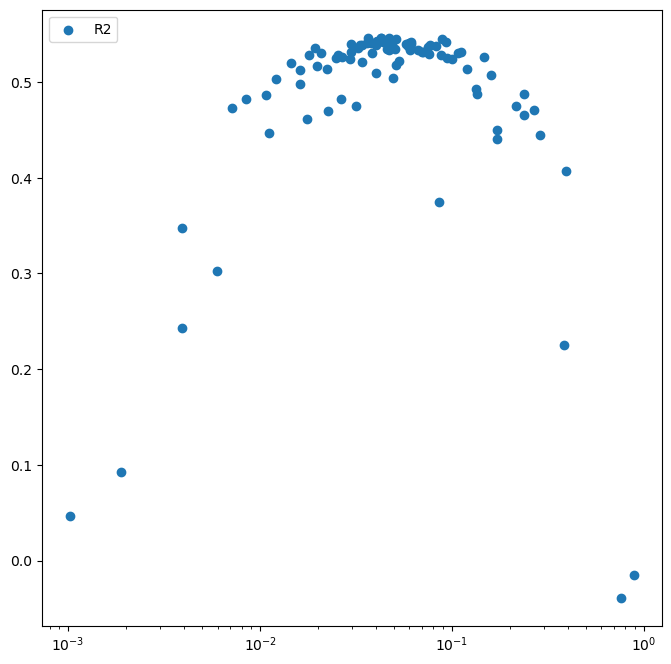

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(df_sort.params_eta.values,df_sort.value.values,label='R2')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [30]:
def objective(trial):
    param = {
        "n_estimators":trial.suggest_int("n_estimators",200,220, step=10),
        "verbosity": 0,
        "objective": 'reg:squarederror',
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        'random_state':42,
    }
        # maximum depth of the tree, signifies complexity of the tree.
    param["max_depth"] = trial.suggest_int("max_depth", 13, 15, step=1)
        # minimum child weight, larger the term more conservative the tree.
    param["min_child_weight"] = trial.suggest_int("min_child_weight", 6, 14,step=2)
    param["eta"] = trial.suggest_float("eta", 0.35, 0.55)
        # defines how selective algorithm is.
    param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    xgb_model = xgb.XGBRegressor(**param)

    r2 = cross_val_score(xgb_model, x, y, n_jobs=-1, cv=5, scoring="r2").mean()
    
    return r2

study = optuna.create_study(
    direction="maximize",
    study_name="xgboost_parameter_opt",
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    )

study.optimize(objective, n_trials=100)
df = study.trials_dataframe()
df.to_csv(r'C:\Users\19189\Desktop\MACCS_xgb_trial4.csv',index=False)

[I 2024-03-19 18:42:45,320] A new study created in memory with name: xgboost_parameter_opt
[I 2024-03-19 18:43:43,840] Trial 0 finished with value: 0.2579056019256005 and parameters: {'n_estimators': 210, 'booster': 'dart', 'lambda': 0.002990274748602169, 'alpha': 2.199482595096618e-06, 'subsample': 0.23151119029035688, 'colsample_bytree': 0.668857132007915, 'max_depth': 15, 'min_child_weight': 8, 'eta': 0.42751146624365366, 'gamma': 1.3724634607154614e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.018425628596326498, 'skip_drop': 3.2041931905352547e-08}. Best is trial 0 with value: 0.2579056019256005.
[I 2024-03-19 18:44:51,342] Trial 1 finished with value: 0.44217116992545213 and parameters: {'n_estimators': 220, 'booster': 'dart', 'lambda': 0.02297300565282193, 'alpha': 3.4021064039945357e-06, 'subsample': 0.9194701116019346, 'colsample_bytree': 0.4931816856739733, 'max_depth': 15, 'min_child_weight': 12, 'eta': 0.3905178932061697

KeyboardInterrupt: 

In [26]:
df3=pd.read_csv(r'C:\Users\19189\Desktop\MACCS_xgb_trial3.csv')
df3

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,params_grow_policy,params_lambda,params_max_depth,params_min_child_weight,params_n_estimators,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
0,0,0.531805,2024-03-19 15:18:02.303115,2024-03-19 15:19:18.587692,0 days 00:01:16.284577,5.529672e-07,dart,0.447337,0.063172,3.861133e-01,lossguide,6.099853e-08,17,14,230,forest,8.818506e-02,weighted,5.735335e-05,0.910174,COMPLETE
1,1,0.484420,2024-03-19 15:19:18.588694,2024-03-19 15:19:26.405832,0 days 00:00:07.817138,8.897020e-04,gbtree,0.326973,0.065702,9.452355e-07,lossguide,5.487577e-07,13,14,210,NaN,NaN,NaN,NaN,0.248171,COMPLETE
2,2,0.528778,2024-03-19 15:19:26.406835,2024-03-19 15:19:55.460627,0 days 00:00:29.053792,4.527393e-07,gbtree,0.764046,0.085042,2.068796e-05,lossguide,4.863383e-01,17,12,240,NaN,NaN,NaN,NaN,0.595313,COMPLETE
3,3,0.489462,2024-03-19 15:19:55.460627,2024-03-19 15:20:57.150708,0 days 00:01:01.690081,1.727407e-04,dart,0.287237,0.058187,1.114646e-04,lossguide,1.712391e-08,15,12,220,forest,6.211341e-03,uniform,1.849909e-08,0.240845,COMPLETE
4,4,0.528664,2024-03-19 15:20:57.152357,2024-03-19 15:21:28.124037,0 days 00:00:30.971680,3.011145e-05,gbtree,0.962724,0.083616,1.538453e-01,depthwise,3.618893e-07,15,8,230,NaN,NaN,NaN,NaN,0.523440,COMPLETE
5,5,0.524689,2024-03-19 15:21:28.125040,2024-03-19 15:21:40.297309,0 days 00:00:12.172269,3.236477e-07,gbtree,0.459683,0.051704,5.706956e-08,depthwise,6.898367e-03,14,12,200,NaN,NaN,NaN,NaN,0.435642,COMPLETE
6,6,0.541488,2024-03-19 15:21:40.298297,2024-03-19 15:23:07.998364,0 days 00:01:27.700067,3.223642e-02,dart,0.658602,0.023695,4.713080e-03,depthwise,4.925752e-02,17,12,230,forest,9.509019e-08,uniform,3.402849e-04,0.866808,COMPLETE
7,7,0.492780,2024-03-19 15:23:07.999367,2024-03-19 15:23:15.689892,0 days 00:00:07.690525,2.635431e-01,gbtree,0.359757,0.055630,4.096081e-07,lossguide,2.725245e-02,15,14,200,NaN,NaN,NaN,NaN,0.281797,COMPLETE
8,8,0.528723,2024-03-19 15:23:15.690894,2024-03-19 15:23:45.600865,0 days 00:00:29.909971,1.410226e-06,gbtree,0.988239,0.093967,6.057904e-01,lossguide,4.419171e-08,17,14,220,NaN,NaN,NaN,NaN,0.932553,COMPLETE
9,9,0.498905,2024-03-19 15:23:45.602194,2024-03-19 15:23:56.162745,0 days 00:00:10.560551,7.036672e-03,gbtree,0.424031,0.075966,9.074056e-06,lossguide,1.905212e-06,16,14,240,NaN,NaN,NaN,NaN,0.276438,COMPLETE


In [27]:
df_sort=df3.sort_values(by='value',ascending=False)
df_sort

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,params_grow_policy,params_lambda,params_max_depth,params_min_child_weight,params_n_estimators,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
31,31,0.546950,2024-03-19 15:50:20.987008,2024-03-19 15:51:40.228130,0 days 00:01:19.241122,1.490698e-03,dart,0.854617,0.045683,3.354299e-05,depthwise,2.943003e-01,14,10,220,forest,2.421690e-02,weighted,1.261005e-03,0.721802,COMPLETE
79,79,0.546568,2024-03-19 16:43:13.883097,2024-03-19 16:44:09.241597,0 days 00:00:55.358500,3.551016e-06,dart,0.526046,0.051136,4.310966e-05,depthwise,8.642362e-02,12,10,200,tree,1.533952e-04,uniform,3.654530e-05,0.850467,COMPLETE
53,53,0.546144,2024-03-19 16:15:32.169417,2024-03-19 16:16:44.926144,0 days 00:01:12.756727,6.858997e-04,dart,0.602828,0.047983,5.354757e-04,depthwise,6.448890e-02,14,10,220,forest,2.550810e-02,weighted,1.543729e-03,0.727565,COMPLETE
74,74,0.545915,2024-03-19 16:39:07.665902,2024-03-19 16:40:06.592038,0 days 00:00:58.926136,1.038491e-05,dart,0.549332,0.041985,3.393156e-03,depthwise,2.848206e-01,13,8,200,tree,4.651110e-04,uniform,6.245433e-04,0.874439,COMPLETE
73,73,0.545624,2024-03-19 16:38:07.969918,2024-03-19 16:39:07.664899,0 days 00:00:59.694981,1.007134e-05,dart,0.586919,0.043008,2.908020e-04,depthwise,2.714875e-01,13,8,200,tree,3.083782e-04,uniform,7.344247e-04,0.878099,COMPLETE
66,66,0.545614,2024-03-19 16:29:41.475639,2024-03-19 16:30:56.894230,0 days 00:01:15.418591,4.040206e-04,dart,0.684862,0.036521,2.202969e-04,depthwise,3.241516e-01,14,8,220,tree,9.519989e-03,uniform,5.663512e-04,0.862328,COMPLETE
42,42,0.545198,2024-03-19 16:01:51.844862,2024-03-19 16:03:08.797600,0 days 00:01:16.952738,1.952055e-03,dart,0.768129,0.036694,2.515827e-05,depthwise,3.051361e-01,14,10,220,forest,7.408251e-03,weighted,1.018462e-02,0.807814,COMPLETE
62,62,0.545176,2024-03-19 16:24:31.004911,2024-03-19 16:25:53.697583,0 days 00:01:22.692672,9.054030e-03,dart,0.721036,0.031117,3.352427e-05,depthwise,1.770016e-01,14,10,230,forest,5.397175e-03,weighted,6.523319e-04,0.714957,COMPLETE
52,52,0.545103,2024-03-19 16:14:18.490439,2024-03-19 16:15:32.168416,0 days 00:01:13.677977,6.106986e-04,dart,0.621074,0.039493,4.991719e-04,depthwise,6.910132e-02,14,10,220,forest,2.537428e-02,weighted,1.782630e-03,0.668862,COMPLETE
68,68,0.544693,2024-03-19 16:32:14.898431,2024-03-19 16:33:19.805518,0 days 00:01:04.907087,1.348044e-04,dart,0.685142,0.040573,1.425109e-03,depthwise,3.147278e-02,13,8,210,tree,3.626817e-03,uniform,5.495582e-04,0.931357,COMPLETE


In [28]:
d=df_sort.iloc[0]
row=d.to_dict()
row

{'number': 31,
 'value': 0.5469498545976841,
 'datetime_start': '2024-03-19 15:50:20.987008',
 'datetime_complete': '2024-03-19 15:51:40.228130',
 'duration': '0 days 00:01:19.241122',
 'params_alpha': 0.0014906977558625,
 'params_booster': 'dart',
 'params_colsample_bytree': 0.8546173904005345,
 'params_eta': 0.0456833498124193,
 'params_gamma': 3.3542988420770624e-05,
 'params_grow_policy': 'depthwise',
 'params_lambda': 0.2943003047107695,
 'params_max_depth': 14,
 'params_min_child_weight': 10,
 'params_n_estimators': 220,
 'params_normalize_type': 'forest',
 'params_rate_drop': 0.024216902211587,
 'params_sample_type': 'weighted',
 'params_skip_drop': 0.001261004949685,
 'params_subsample': 0.7218018660663547,
 'state': 'COMPLETE'}

In [32]:
param={'alpha': 0.0014906977558625,
 'booster': 'dart',
 'colsample_bytree': 0.8546173904005345,
 'eta': 0.0456833498124193,
 'gamma': 3.3542988420770624e-05,
 'grow_policy': 'depthwise',
 'lambda': 0.2943003047107695,
 'max_depth': 14,
 'min_child_weight': 10,
 'n_estimators': 220,
 'normalize_type': 'forest',
 'rate_drop': 0.024216902211587,
 'sample_type': 'weighted',
 'skip_drop': 0.001261004949685,
 'subsample': 0.7218018660663547,
 'random_state':42,
 'verbosity': 0,
 'objective': 'reg:squarederror'}

In [33]:
xgb_model_optimized= xgb.XGBRegressor(**param)
r2 = cross_val_score(xgb_model_optimized, x, y, n_jobs=-1, cv=5, scoring="r2").mean()
r2

0.5458561904829073

In [34]:
xgb_model= xgb.XGBRegressor(random_state=42)
r2 = cross_val_score(xgb_model, x, y, n_jobs=-1, cv=5, scoring="r2").mean()
r2

0.4892329334915192